Performing an anomaly detection analysis with a dataset of Walmart sales available in [kaggle](https://www.kaggle.com/datasets/ujjwalchowdhury/walmartcleaned).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.inspection import  DecisionBoundaryDisplay

In [3]:
data = pd.read_csv('data/walmart_cleaned.csv')
data.head(3)

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [4]:
print(f'Number of weeks:{data["Date"].unique().size}')

Number of weeks:143


In [5]:
cols = ['IsHoliday','Dept','Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
data = data[cols]
data.head(2)

,IsHoliday,Dept,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,0,1.0,42.31,2.572,211.096358,8.106,24924.50
1,0,26.0,42.31,2.572,211.096358,8.106,11737.12


In [6]:
m,n = data.shape
print(f'Number of samples: {m}; Number of features: {n}.')

Number of samples: 421570; Number of features: 7.


To simplify the problem we choose just 2 features:

In [7]:
X_train = data[['CPI','Weekly_Sales']]

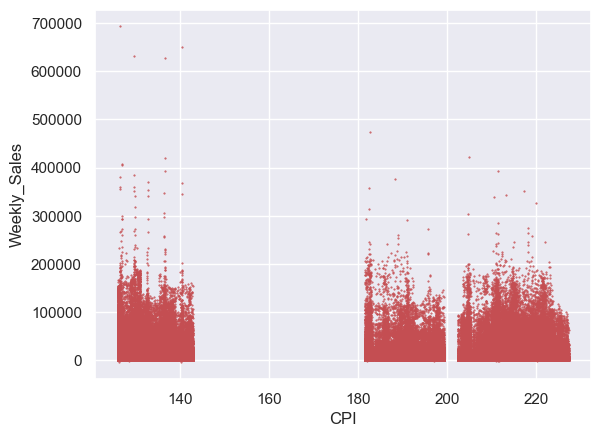

In [8]:
sb.set()
plt.scatter(data['CPI'], data['Weekly_Sales'], c='r', marker='.', s=1)
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

Using Isolation Forest from sklearn:

In [9]:
anom = IsolationForest(max_samples=100, random_state=0)
anom.fit(X_train)

IsolationForest(max_samples=100, random_state=0)

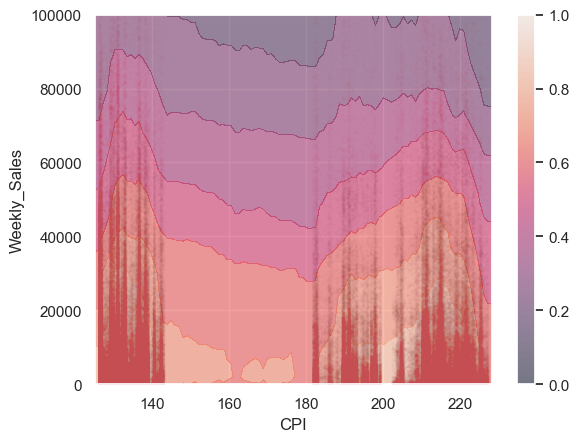

In [23]:
display = DecisionBoundaryDisplay.from_estimator(anom, X_train, response_method='decision_function', alpha=0.5)
display.ax_.scatter(X_train['CPI'], X_train['Weekly_Sales'], s=1, c='r', alpha=0.01)
plt.colorbar(display.ax_.collections[1])
plt.ylim(0,100e3)
# plt.yscale('log')
plt.show()

All samples outside the white region are outlier following a conventional approach.